Reference:

**"Topic Modelling with LSA and LDA" (LSA & LDA)**

https://www.kaggle.com/code/rcushen/topic-modelling-with-lsa-and-lda/notebook

**"Using Topic Modeling Methods for Short-Text Data: A Comparative Analysis" (NMF)**

https://www.frontiersin.org/articles/10.3389/frai.2020.00042/full

**1. Data Exploration**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

from wordcloud import WordCloud, ImageColorGenerator
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import dataset

# Replace with your own file path
original_file = '/content/drive/MyDrive/Machine Learning/abcnews-date-text_original.csv'
dataset = pd.read_csv(original_file, parse_dates=[0], infer_datetime_format=True)

dataset.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [6]:
print("The total number of news headlines: ",len(dataset.index))
print("The date of earliest news headlines: ",min(dataset['publish_date']))
print("The date of latest news headlines: ",max(dataset['publish_date']))

The total number of news headlines:  1244184
The date of earliest news headlines:  2003-02-19 00:00:00
The date of latest news headlines:  2021-12-31 00:00:00


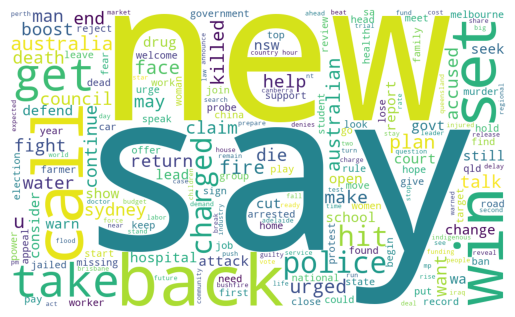

In [ ]:
# Wordcloud
# Reference: https://www.youtube.com/watch?v=HcKUU5nNmrs

allText = ''
SW = stopwords.words("english")
for headlines in dataset.headline_text.values:
  allText += f"{headlines}"
wordcloud = WordCloud(
    background_color = 'white',
    stopwords = SW,
    height = 600,
    width = 1000
)
wordcloud.generate(allText)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**2. Data Preprocessing**

In [ ]:
# CountVectorizer (focused on frequency of words)
# CV = CountVectorizer(stop_words='english', max_features=40000)
# dataset_CV = CV.fit_transform(dataset['headline_text'].sample(n=10000, random_state=0).values)

# TfidfVectorizer (focused on frequency of words with weighting, suggested )
TV = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
dataset_TV = TV.fit_transform(dataset['headline_text'].sample(n=10000, random_state=0).values)

**3. Topic Modeling (assumed 8 topics and each has 10 top wordings,  you can change it if you want) Provided by Professor**

In [ ]:
# LSA
LSA_model = TruncatedSVD(n_components=8)
LSA_matrix = LSA_model.fit_transform(dataset_TV)

for index, topic in enumerate(LSA_model.components_):
  print(f"The top 10 words for topic {index+1}")
  print([TV.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
  print('\n')

The top 10 words for topic 1
['new', 'missing', 'court', 'murder', 'death', 'charged', 'car', 'crash', 'police', 'man']


The top 10 words for topic 2
['david', 'nrl', 'smith', 'tom', 'afl', 'daniel', 'extended', 'ben', 'michael', 'interview']


The top 10 words for topic 3
['death', 'stabbing', 'killed', 'jailed', 'guilty', 'dies', 'murder', 'court', 'charged', 'man']


The top 10 words for topic 4
['water', 'news', 'plan', 'national', 'says', 'nsw', 'govt', 'rural', 'council', 'new']


The top 10 words for topic 5
['market', 'monday', 'weather', 'business', 'crash', 'abc', 'nsw', 'news', 'national', 'rural']


The top 10 words for topic 6
['road', 'injured', 'hospital', 'plane', 'driver', 'killed', 'dies', 'fatal', 'car', 'crash']


The top 10 words for topic 7
['fatal', 'dies', 'killed', 'man', 'car', 'news', 'national', 'rural', 'crash', 'new']


The top 10 words for topic 8
['missing', 'charged', 'hospital', 'car', 'rural', 'man', 'govt', 'water', 'plan', 'council']




In [ ]:
# LDA
LDA_model = LatentDirichletAllocation(n_components=8)
LDA_model.fit(dataset_TV)

LDA_matrix = LDA_model.fit_transform(dataset_TV)

for index, topic in enumerate(LDA_model.components_):
  print(f"The top 10 words for topic {index+1}")
  print([TV.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
  print('\n')

The top 10 words for topic 1
['hope', 'house', 'track', 'car', 'crash', 'missing', 'hospital', 'woman', 'man', 'new']


The top 10 words for topic 2
['wa', 'trial', 'plan', 'accused', 'govt', 'commission', 'boost', 'action', 'country', 'court']


The top 10 words for topic 3
['defence', 'australian', 'fatal', 'car', 'charged', 'assault', 'crash', 'police', 'man', 'interview']


The top 10 words for topic 4
['green', 'guilty', 'south', 'award', 'project', 'closer', 'abc', 'east', 'weather', 'wins']


The top 10 words for topic 5
['pay', 'work', 'sydney', 'new', '19', 'man', 'australia', 'police', 'covid', 'day']


The top 10 words for topic 6
['cup', 'market', 'australia', 'cuts', 'new', 'business', 'says', 'national', 'news', 'rural']


The top 10 words for topic 7
['gold', 'police', 'world', 'cup', 'change', 'search', 'govt', 'budget', 'climate', 'north']


The top 10 words for topic 8
['new', 'death', 'water', 'family', 'farmers', 'plans', 'driver', 'media', 'govt', 'police']




In [ ]:
# NMF
# Reference: https://www.youtube.com/watch?v=F0nQHfhMDTU

NMF_model = NMF(n_components=8)
NMF_model.fit(dataset_TV)
NMF_matrix = NMF_model.fit_transform(dataset_TV)

for index, topic in enumerate(NMF_model.components_):
  print(f"The top 10 words for topic {index+1}")
  print([TV.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
  print('\n')

The top 10 words for topic 1
['stabbing', 'accused', 'sydney', 'guilty', 'jailed', 'death', 'murder', 'court', 'charged', 'man']


The top 10 words for topic 2
['james', 'nrl', 'smith', 'afl', 'tom', 'daniel', 'extended', 'ben', 'michael', 'interview']


The top 10 words for topic 3
['shooting', 'woman', 'hunt', 'station', 'death', 'probe', 'missing', 'search', 'investigate', 'police']


The top 10 words for topic 4
['urged', 'sa', 'south', 'wa', 'qld', 'health', 'australia', 'nsw', 'govt', 'says']


The top 10 words for topic 5
['reporter', 'tasmania', 'monday', 'weather', 'business', 'nsw', 'abc', 'news', 'national', 'rural']


The top 10 words for topic 6
['hospital', 'road', 'injured', 'plane', 'killed', 'driver', 'dies', 'fatal', 'car', 'crash']


The top 10 words for topic 7
['australian', 'coronavirus', 'gold', 'cases', 'year', 'chief', 'help', 'zealand', 'home', 'new']


The top 10 words for topic 8
['public', 'change', 'development', 'land', 'residents', 'climate', 'considers'

**#### Visualizion ####**

**t-SNE will be used visualizing LSA, LDA, and NFM models, which is a machine learning model for data visualization and dimensionality reduction**

In [ ]:
TSNE_LSA_model = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=2000, verbose=1, random_state=0, angle=0.75)
TSNE_LSA_matrix = TSNE_LSA_model.fit_transform(LSA_matrix)

TSNE_LDA_model = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=2000, verbose=1, random_state=0, angle=0.75)
TSNE_LDA_matrix = TSNE_LDA_model.fit_transform(LDA_matrix)

TSNE_NMF_model = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=2000, verbose=1, random_state=0, angle=0.75)
TSNE_NMF_matrix = TSNE_NMF_model.fit_transform(NMF_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 0.949s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.002642
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.409111
[t-SNE] KL divergence after 2000 iterations: 1.315612
[t-SNE] Computing 151 ne

In [ ]:
TSNE_LSA_matrix
#shape: (10000, 2)

array([[-15.625459 ,  42.01331  ],
       [  7.160648 , -20.730587 ],
       [ -5.9684815,   5.332721 ],
       ...,
       [-26.260448 ,  36.52368  ],
       [ 20.469921 , -15.561517 ],
       [ 49.648144 , -27.94404  ]], dtype=float32)

In [ ]:
TSNE_LDA_matrix
#shape: (10000, 2)

array([[ 26.238245 ,  18.177    ],
       [ 16.71805  ,  -5.8252273],
       [ 13.145634 , -74.82403  ],
       ...,
       [-26.00545  ,  30.48212  ],
       [  7.849255 , -36.360302 ],
       [-64.87631  , -46.129322 ]], dtype=float32)

In [ ]:
TSNE_NMF_matrix

array([[-19.486286 ,  32.637894 ],
       [ 41.698475 , -16.909616 ],
       [ -9.03325  ,  -4.4613905],
       ...,
       [  7.1904883,  41.86677  ],
       [  9.322676 ,  -8.553349 ],
       [-53.376644 , -35.093117 ]], dtype=float32)

**Visualizing LSA**

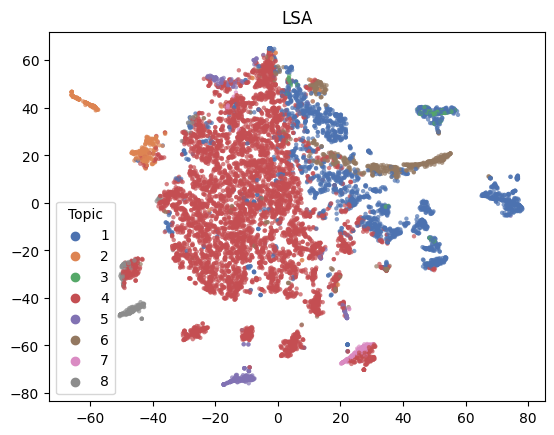

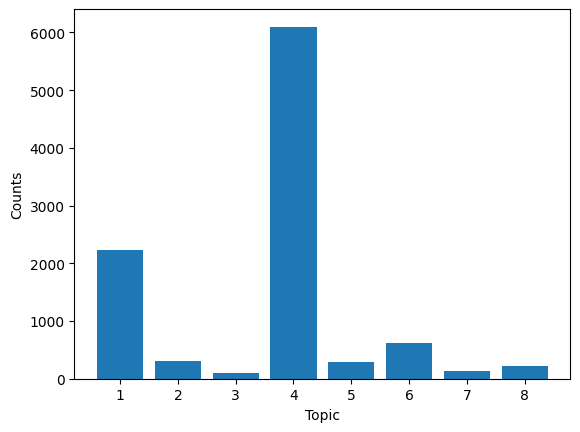

In [ ]:
lsa_keys = LSA_matrix.argmax(axis=1).tolist()
lsa_keys = [x + 1 for x in lsa_keys]

#Cluster Visualizion
ax = sb.scatterplot(data=TSNE_LSA_matrix, x=TSNE_LSA_matrix[:,0], y=TSNE_LSA_matrix[:,1], hue=lsa_keys, edgecolor='None', alpha=0.7, palette="deep", s=10)
plt.title('LSA')
ax.legend(title="Topic")
plt.show()

#Topic Count
unique_values, counts = np.unique(lsa_keys, return_counts=True)
plt.bar(unique_values, counts)
plt.xlabel('Topic')
plt.ylabel('Counts')
plt.show()


**Visualizing LDA**

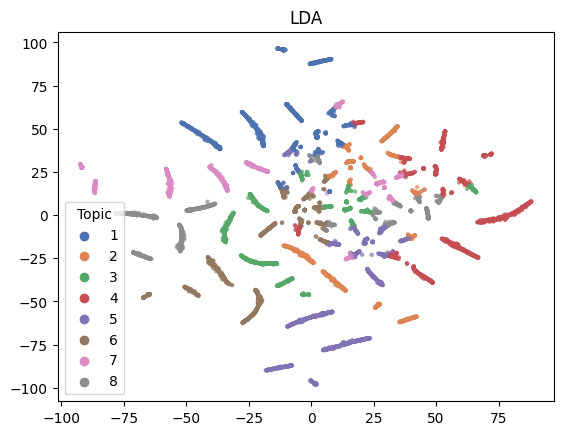

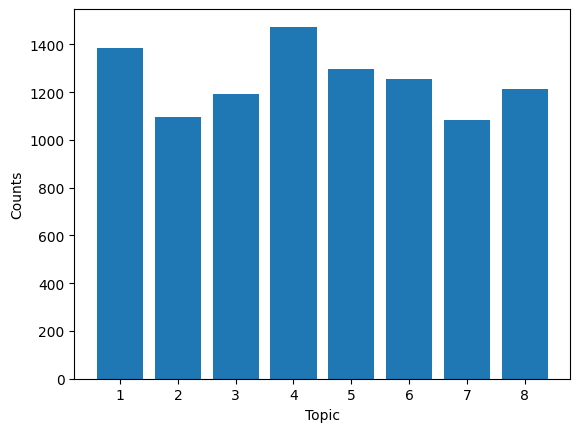

In [ ]:
lda_keys = LDA_matrix.argmax(axis=1).tolist()
lda_keys = [x + 1 for x in lda_keys]

#Cluster Visualizion
ax = sb.scatterplot(data=TSNE_LDA_matrix, x=TSNE_LDA_matrix[:,0], y=TSNE_LDA_matrix[:,1], hue=lda_keys, edgecolor='None', alpha=0.7, palette="deep", s=10)
plt.title('LDA')
ax.legend(title="Topic")
plt.show()

#Topic Count
unique_values, counts = np.unique(lda_keys, return_counts=True)
plt.bar(unique_values, counts)
plt.xlabel('Topic')
plt.ylabel('Counts')
plt.show()

**Visualizing NMF**

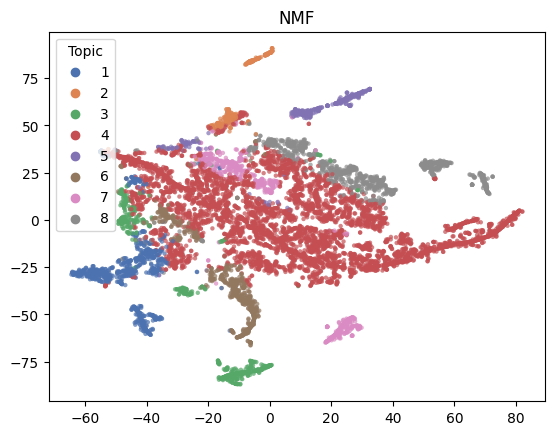

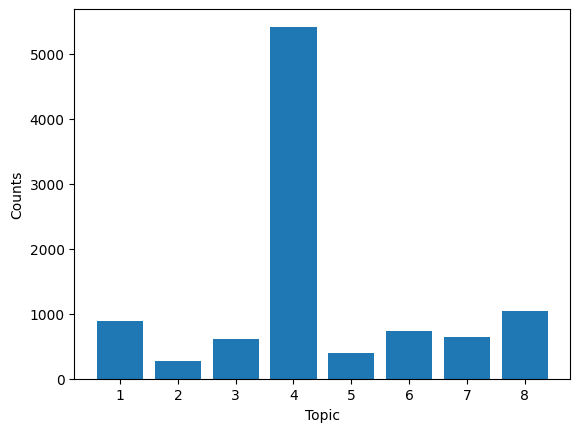

In [ ]:
nmf_keys = NMF_matrix.argmax(axis=1).tolist()
nmf_keys = [x + 1 for x in nmf_keys]

#Cluster Visualizion
ax = sb.scatterplot(data=TSNE_NMF_matrix, x=TSNE_NMF_matrix[:,0], y=TSNE_NMF_matrix[:,1], hue=nmf_keys, edgecolor='None', alpha=0.7, palette="deep", s=10)
plt.title('NMF')
ax.legend(title="Topic")
plt.show()

#Topic Count
unique_values, counts = np.unique(nmf_keys, return_counts=True)
plt.bar(unique_values, counts)
plt.xlabel('Topic')
plt.ylabel('Counts')
plt.show()


**Topic Coherence Evaluation**

In [ ]:
# from gensim.models import CoherenceModel

# # instantiate topic coherence model
# cm = CoherenceModel(model=LDA_model, corpus=bow_corpus, texts=docs, coherence='c_v')

# # get topic coherence score
# coherence_lda = cm.get_coherence() 
# print(coherence_lda)

#Dict object to array
dict = TV.vocabulary_
vocabs = list(dict.keys())
vocabs_array = np.array(vocabs)

from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
import statistics

tokenized_headlines = [doc.split() for doc in dataset["headline_text"]]

def coherence_value(trained_model):

    coherence = metric_coherence_gensim(measure='c_v', 
                        top_n=10, 
                        topic_word_distrib=trained_model.components_, 
                        dtm=dataset_TV, 
                        vocab=vocabs_array, 
                        texts= tokenized_headlines )
    
    return coherence

TC_LSA = coherence_value(LSA_model)
print("LSA TC: ", TC_LSA)
print("Max: " , max(TC_LSA), "\nMin: " , min(TC_LSA), "\nMean: " , statistics.mean(TC_LSA), "\nStandard Deviation: ", np.std(TC_LSA), "\n")

TC_LDA = coherence_value(LDA_model)
print("LDA TC: ", TC_LDA)
print("Max: " , max(TC_LDA), "\nMin: " , min(TC_LDA), "\nMean: " , statistics.mean(TC_LDA), "\nStandard Deviation: ", np.std(TC_LDA), "\n")

TC_NMF = coherence_value(NMF_model)
print("NMF TC: ", TC_NMF)
print("Max: " , max(TC_NMF), "\nMin: " , min(TC_NMF), "\nMean: " , statistics.mean(TC_NMF), "\nStandard Deviation: ", np.std(TC_NMF), "\n")


LSA TC:  [0.29549703518538584, 0.36606315141139756, 0.3524104167643185, 0.41899968918117036, 0.2591570298243999, 0.377872849315663, 0.2736466239756698, 0.38116881164600214]
Max:  0.41899968918117036 
Min:  0.2591570298243999 
Mean:  0.3406019509130009 
Standard Deviation:  0.05375808360008121 

LDA TC:  [0.3441146002573004, 0.26044309476674954, 0.3629241232752769, 0.3770948835502491, 0.311810664693301, 0.3312797512192658, 0.34803069004542597, 0.34150492193772397]
Max:  0.3770948835502491 
Min:  0.26044309476674954 
Mean:  0.33465034121816156 
Standard Deviation:  0.033459423678045004 

NMF TC:  [0.3437472726646607, 0.36606315141139756, 0.4043055139506713, 0.40571044827448294, 0.2983111111301985, 0.4255130077828174, 0.32805608744993664, 0.2726461775615975]
Max:  0.4255130077828174 
Min:  0.2726461775615975 
Mean:  0.3555440962782203 
Standard Deviation:  0.05116526289545457 



**Topic Diversity Evaluation**

In [ ]:
LSA_Topics = LSA_model.components_
diversity_score = cosine_similarity(LSA_Topics)
diversity_score = diversity_score - diversity_score.min() + diversity_score.max()
print(f"Topic diversity score: {diversity_score}")


Topic diversity score: [[2. 1. 1. 1. 1. 1. 1. 1.]
 [1. 2. 1. 1. 1. 1. 1. 1.]
 [1. 1. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 1. 2. 1. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1.]
 [1. 1. 1. 1. 1. 1. 2. 1.]
 [1. 1. 1. 1. 1. 1. 1. 2.]]


In [ ]:
##Backup Junk Codes

LSA_Topics_Array = np.empty((0,10))
for topic in (LSA_model.components_):
  temp = [TV.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
  LSA_Topics_Array = np.vstack((LSA_Topics_Array, temp))

LSA_Topics_Array.shape

# Get the vocabulary and convert it to a dictionary
vocabulary = TV.vocabulary_
vocabulary = {term: idx for idx, term in enumerate(vocabulary)}

def coherence(topics):
    # Create a dictionary that maps topic indices to their top words
    top_words = {idx: [TV.get_feature_names_out()[term_id] for term_id in topic.argsort()[:-11:-1]]
                 for idx, topic in enumerate(topics)}
    # Compute pairwise cosine similarity between top words
    similarity = 0.0
    pairs = 0
    for i in range(len(topics)):
        for j in range(i+1, len(topics)):
            for word_i in top_words[i]:
                for word_j in top_words[j]:
                    if word_i in vocabulary and word_j in vocabulary:
                        vec_i = dataset_TV[:, vocabulary[word_i]].toarray().flatten()
                        vec_j = dataset_TV[:, vocabulary[word_j]].toarray().flatten()
                        similarity += cosine_similarity(vec_i.reshape(1,-1), vec_j.reshape(1,-1))[0,0]
                        pairs += 1
    return similarity / pairs

# Assume you have calculated the top n words for each topic and stored them in a list called top_n_words
print(f"LSA Coherence score: {coherence(LSA_model.components_)}")
print(f"LDA Coherence score: {coherence(LDA_model.components_)}")
print(f"NMF Coherence score: {coherence(NMF_model.components_)}")


(8, 10)